## Imports

In [1]:
import numpy as np

from IPython.display import Image

---

## Binary Classification

In [2]:
size = 1_000

np.random.seed(1009)
target = np.random.randint(low=0, high=2, size=size)

np.random.seed(10092001)
predicted = np.random.randint(low=0, high=2, size=size)

In [3]:
sum(target == 0) / size, sum(predicted == 0) / size

(0.478, 0.508)

### Confusion matrix

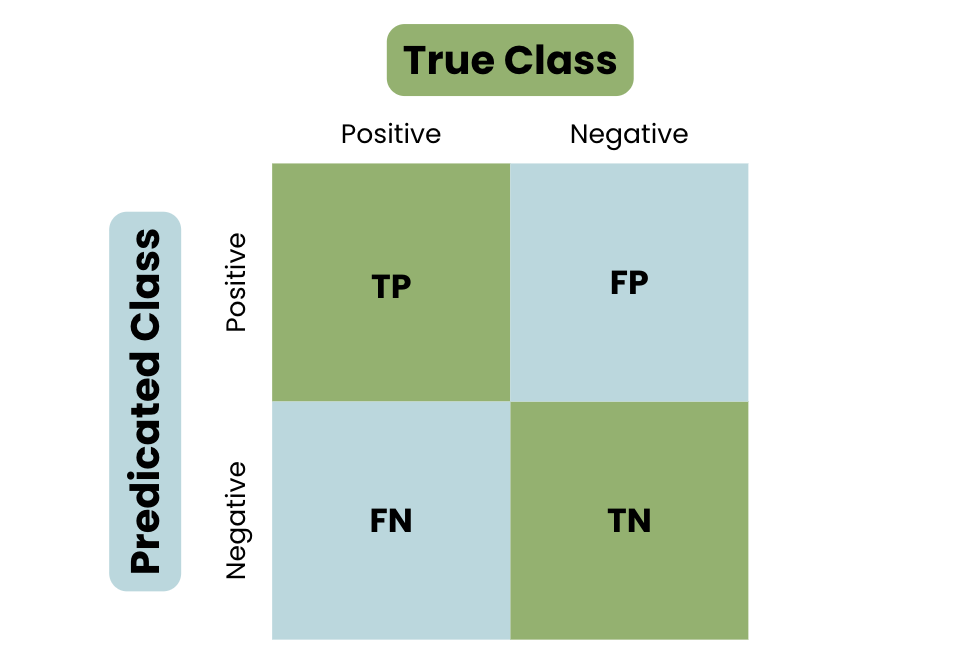

In [4]:
Image('conf_matrix.png') 

In [5]:
TP = np.sum( (target == 1) & (predicted == 1) )
FN = np.sum( (target == 1) & (predicted == 0) )
FP = np.sum( (target == 0) & (predicted == 1) )
TN = np.sum( (target == 0) & (predicted == 0) )

print(TP, FP)
print(FN, TN)

270 222
252 256


### Accuracy

$$ Accuracy = (TP + TN) / (TP + FP + TN + FN) $$

In [6]:
def accuracy(target: np.array, predicted: np.array) -> float:
    return np.sum(target == predicted) / target.shape[0]

In [7]:
accuracy(target, predicted)

0.526

### Error Rate

$$ Error Rate = 1 - Accuracy = (FP + FN) / (TP + FP + TN + FN) $$

In [8]:
def error_rate(target: np.array, predicted: np.array) -> float:
    return np.sum(target != predicted) / target.shape[0]

In [9]:
error_rate(target, predicted)

0.474

### Precision – не прихватить лишнее

$$ Precision = TP / (TP + FP) $$

In [10]:
def precision(target: np.array, predicted: np.array) -> float:
    
    TP = np.sum( (target == 1) & (predicted == 1) )
    FP = np.sum( (target == 0) & (predicted == 1) )
    
    return TP / (TP + FP)

In [11]:
precision(target, predicted)

0.5487804878048781

### Recall - не пропустить нужное

$$ Recall = TP / (TP + FN)$$

In [12]:
def recall(target: np.array, predicted: np.array) -> float:
    
    TP = np.sum( (target == 1) & (predicted == 1) )
    FN = np.sum( (target == 1) & (predicted == 0) )
    
    return TP / (TP + FN)

In [13]:
recall(target, predicted)

0.5172413793103449

### F1-score

##### Harmonic Mean

$$ H(x_1, ..., x_n) = \frac{n}{\frac{1}{x_1} + ... + \frac{1}{x_n}} $$

##### Harmonic Mean of Precision and Recall

$$ F_1 = \frac{2*Precision*Recall}{Precision + Recall} $$

In [14]:
def f1_score(target: np.array, predicted: np.array) -> float:
    
    TP = np.sum( (target == 1) & (predicted == 1) )
    FN = np.sum( (target == 1) & (predicted == 0) )
    FP = np.sum( (target == 0) & (predicted == 1) )
    
    Recall = TP / (TP + FN)
    Precision = TP / (TP + FP)
    
    return 2 * Precision * Recall/ (Precision + Recall)

In [15]:
f1_score(target, predicted)

0.5325443786982249

### ROC-AUC

Когда ML-модель делает предсказания - она выдает нам вероятности принадлежности к классу. Далее мы сравниваем вероятность со значением 1/2 и относим к 0 или 1.

In [16]:
np.random.seed(1009)
target = np.random.randint(low=0, high=2, size=size)

np.random.seed(10092001)
predicted_proba = np.random.random(size=size)

predicted = predicted_proba.copy()
predicted[predicted >= 1/2] = 1
predicted[predicted < 1/2] = 0

Далее вычислим вспомогательные метрики:

$$ TPR = TP / (TP + FN) $$
$$ FPR = FP / (FP + TN) $$

In [17]:
def tpr(target: np.array, predicted: np.array) -> float:
    
    TP = np.sum( (target == 1) & (predicted == 1) )
    FN = np.sum( (target == 1) & (predicted == 0) )
    
    return TP / (TP + FN)

In [18]:
def fpr(target: np.array, predicted: np.array) -> float:
    
    FP = np.sum( (target == 0) & (predicted == 1) )
    TN = np.sum( (target == 0) & (predicted == 0) )
    
    return FP / (FP + TN)

In [19]:
tpr(target, predicted), fpr(target, predicted)

(0.5114942528735632, 0.5251046025104602)

Но нам, как статистикам, не нравится точечная оценка, мы хотим интервал, либо что-то более объемлющее. Поэтому предлагается такой вариант, мы будем перебирать порог, который изначально равен 1/2. Для каждого порога считать значения tpr, fpr, а затем построим график в осях (fpr, tpr).

Как мы выбираем пороги?
- Пороги это как раз те самые вероятности принадлежности к классу (predicted_proba)

In [20]:
def roc_auc(target: np.array, predicted_proba: np.array) -> list:
    
    def tpr(target: np.array, predicted: np.array) -> float:
        TP = np.sum( (target == 1) & (predicted == 1) )
        FN = np.sum( (target == 1) & (predicted == 0) )
        return TP / (TP + FN)
    
    def fpr(target: np.array, predicted: np.array) -> float:
        FP = np.sum( (target == 0) & (predicted == 1) )
        TN = np.sum( (target == 0) & (predicted == 0) )
        return FP / (FP + TN)
    
    tpr_values = []
    fpr_values = []
    
    for proba in predicted_proba:
        
        predicted = predicted_proba.copy()
        predicted[predicted >= proba] = 1
        predicted[predicted < proba] = 0
    
        tpr_val = tpr(target, predicted)
        fpr_val = fpr(target, predicted)
        
        tpr_values.append(tpr_val)
        fpr_values.append(fpr_val)
    
    return tpr_values, fpr_values

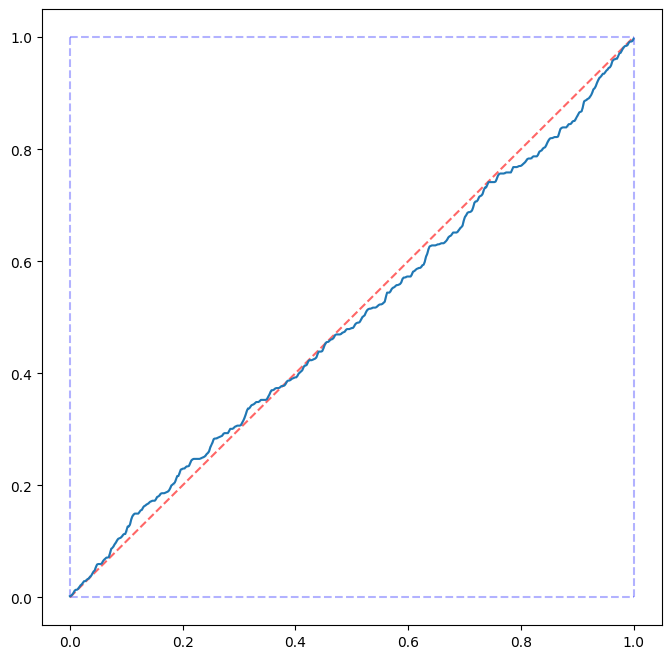

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

tpr_values, fpr_values = roc_auc(target, predicted_proba)

plt.figure(figsize=(8, 8))
# bounds
plt.plot([0, 0], [0, 1], color='b', ls='--', alpha=0.3)
plt.plot([0, 1], [1, 1], color='b', ls='--', alpha=0.3)
plt.plot([0, 1], [0, 0], color='b', ls='--', alpha=0.3)
plt.plot([1, 1], [0, 1], color='b', ls='--', alpha=0.3)
# bad classif
plt.plot([0, 1], [0, 1], color='r', ls='--', alpha=0.6)

sns.lineplot(y=tpr_values, x=fpr_values)
plt.show()

Теперь, чтобы превратить график в чиселку - считаем площадь под графиком.

In [22]:
def roc_auc(tpr_values: list, fpr_values: list) -> float:
    order = np.array(fpr_values).argsort()
    return np.trapz(np.array(tpr_values)[order], np.array(fpr_values)[order])

In [23]:
roc_auc(tpr_values, fpr_values)

0.49351945366229016

### Q

- Как интерпретировать ROC-AUC?
- В чем отличие ROC-AUC и ROC? (просто знание расшифровки)
- Какая модель лучше, у которой ROC-AUC=0.1 или ROC-AUC=0.7? (а также более сложная интерпретация и пояснение)

---

## Regression

In [24]:
size = 1_000

np.random.seed(1009)
target = np.random.normal(loc=0, scale=13, size=size)

np.random.seed(10092001)
predicted = np.random.normal(loc=1, scale=15, size=size)

### MAE

$$ MAE = \frac{1}{n} \sum_n{|x - \hat{x}|}$$

In [25]:
def mae(target: np.array, predicted: np.array) -> float:
    return np.sum(np.abs(target - predicted)) / target.shape[0]

In [26]:
mae(target, predicted)

16.201545240960723

### MSE

$$ MSE = \frac{1}{n} \sum_n{(x - \hat{x})^2}$$

In [27]:
def mse(target: np.array, predicted: np.array) -> float:
    return np.sum( (target - predicted)**2 ) / target.shape[0]

In [28]:
mse(target, predicted)

412.3219899914543

### RMSE

$$ RMSE = \sqrt{\frac{1}{n} \sum_n{(x - \hat{x})^2}} $$

In [29]:
def rmse(target: np.array, predicted: np.array) -> float:
    return np.sqrt( np.sum( (target - predicted)**2 ) / target.shape[0] )

In [30]:
rmse(target, predicted)

20.305713235231465

### MAPE

$$ MAPE = \frac{1}{n} \sum_n|\frac{{x - \hat{x}}}{x}|$$

In [31]:
def mape(target: np.array, predicted: np.array) -> float:
    return np.sum(np.abs( (target - predicted)  / target) ) / target.shape[0]

In [32]:
mape(target, predicted)

5.541385452507526

### R^2

$$ R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{MSE}{VAR(y)} $$

In [33]:
def r_sq(target: np.array, predicted: np.array) -> float:
    
    mse = np.sum( (target - predicted)**2 ) / target.shape[0]
    var_y = np.var(target)
    
    return 1 - mse / var_y

In [34]:
r_sq(target, predicted)

-1.335242310438172

### Q

- **RMSE против MAE: какую метрику следует использовать?**
    
    Если мы хотим придать больший вес наблюдениям, которые находятся дальше от среднего, то лучше использовать RMSE для измерения ошибки, потому что RMSE более чувствителен к наблюдениям, которые далеки от среднего.
    
- Как интерпретировать R^2?

---